In [1]:
from google.colab import drive
from google.colab import runtime
import pickle
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
SIZE_TITLE = 24
SIZE_LABELS = 24
SIZE_TICKS = 18
SIZE_LEGEND = 18

In [3]:
!pip install gdown
!pip install -U pysal
!pip install geopandas
!pip install torch_geometric pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-geometric-temporal
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/COE770_Machine_Learning_on_Graphs.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FelipeSchreiber/COE770_Machine_Learning_on_Graphs.git to /tmp/pip-req-build-_ph5q1kj
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/COE770_Machine_Learning_on_Graphs.git /tmp/pip-req-build-_ph5q1kj
  Resolved https://github.com/FelipeSchreiber/COE770_Machine_Learning_on

In [4]:
from Tests.benchmark import *
gammas=np.logspace(1,6,num=3).astype(int)
filters = [2,4,8]

In [5]:
benchmark = CovidBenchmark()
stats = benchmark.run_test(lags=4,filter_sizes=filters,\
                           train_model=True,\
                           gammas=gammas,\
                           num_epochs=100,\
                           warm_start=False)

0it [00:00, ?it/s]
100%|██████████| 100/100 [35:13<00:00, 21.13s/it]
1it [35:44, 2144.43s/it]
100%|██████████| 100/100 [34:55<00:00, 20.95s/it]
2it [1:11:08, 2132.68s/it]
100%|██████████| 100/100 [35:02<00:00, 21.03s/it]
3it [1:46:43, 2133.37s/it]
100%|██████████| 100/100 [41:29<00:00, 24.89s/it]
4it [2:28:43, 2286.34s/it]
100%|██████████| 100/100 [41:33<00:00, 24.94s/it]
5it [3:10:48, 2372.41s/it]
100%|██████████| 100/100 [41:38<00:00, 24.99s/it]
6it [3:53:00, 2426.42s/it]
100%|██████████| 100/100 [54:56<00:00, 32.97s/it]
7it [4:48:28, 2721.38s/it]
100%|██████████| 100/100 [54:40<00:00, 32.80s/it]
8it [5:43:42, 2909.92s/it]
100%|██████████| 100/100 [55:21<00:00, 33.22s/it]
9it [6:39:38, 2664.27s/it]


In [6]:
stats

{'MSE': [997887.5547767831,
  993187.6923364727,
  939560.6350595737,
  993224.0383074771,
  993499.8650559159,
  993226.6874311005,
  941139.0895529822,
  1040357.5631344679,
  917183.5947507465],
 'gamma': [10, 3162, 1000000, 10, 3162, 1000000, 10, 3162, 1000000],
 'filter_size': [2, 2, 2, 4, 4, 4, 8, 8, 8]}

In [7]:
with open('covid_test_0.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/covid_test_0.pickle" "/content/drive/MyDrive"

In [8]:
test_0=None
with open("/content/drive/MyDrive/covid_test_0.pickle", 'rb') as handle:
    test_0 = pickle.load(handle)
test_0.keys()

dict_keys(['MSE', 'gamma', 'filter_size'])

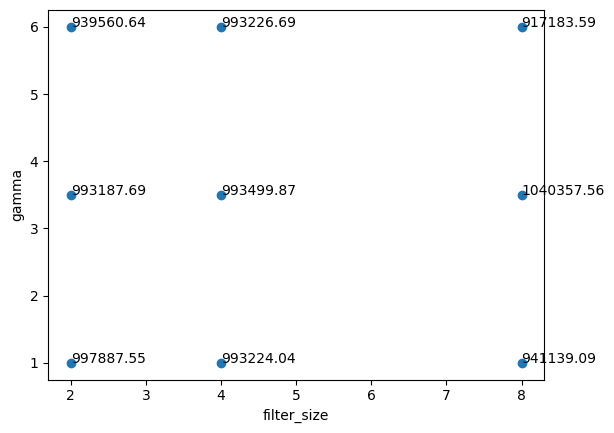

In [9]:
def scatter_(dict_,x_name,y_name,z_name):
  fig, ax = plt.subplots()
  x,y = dict_[x_name],np.log10(dict_[y_name])
  ax.scatter(x,y)
  for i, txt in enumerate(dict_[z_name]):
      ax.annotate("{:.2f}".format(txt), (x[i], y[i]))
  ax.set_xlabel(x_name)
  ax.set_ylabel(y_name)
scatter_(test_0,'filter_size','gamma', 'MSE')

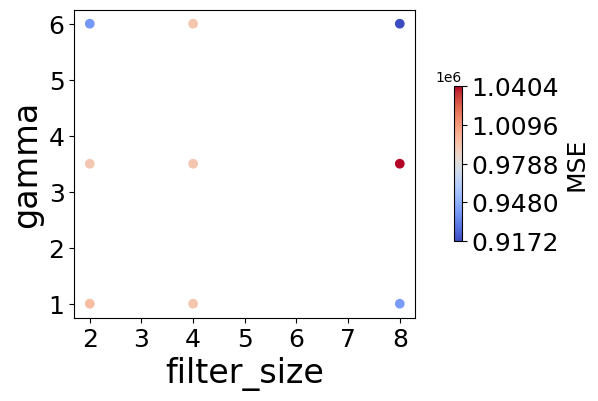

In [10]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = test_0['filter_size'] ,np.log10(test_0['gamma']),test_0["MSE"]
xlabel="filter_size"
ylabel='gamma'
ticks = np.linspace(np.min(z), np.max(z), 5, endpoint=True)
C = ax.scatter(x=x,y=y,c=z,cmap="coolwarm")
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='MSE',ticks=ticks)
cb.set_label(label='MSE', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

9it [03:46, 25.14s/it]


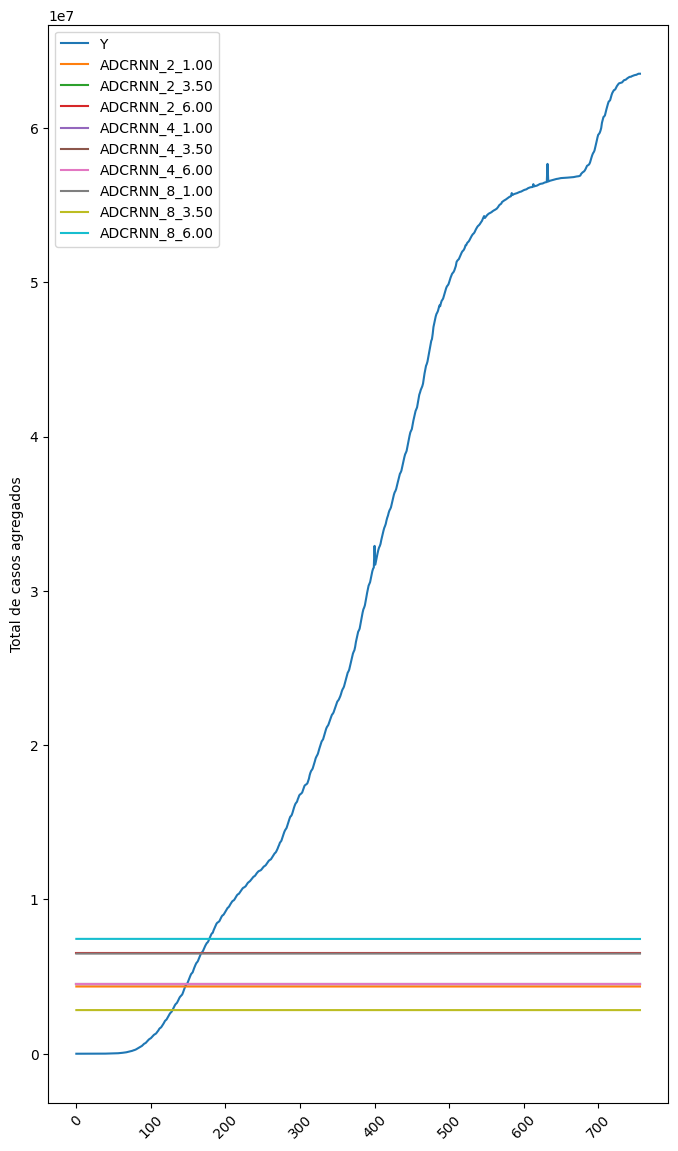

In [14]:
loader = CovidDatasetLoader(method="other")
dataset = loader.get_dataset(lags=4)
# train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)
i = 0
fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
for filter_size, gamma in tqdm(product(filters,gammas)):
  model = get_model(False,num_features=35,num_filters=filter_size,gamma=gamma)
  model.to(device)
  model.eval()
  cost = 0
  preds = []
  y = []
  for time, snapshot in enumerate(dataset):
      snapshot.to(device)
      y_hat,_ = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
      preds.append(y_hat.sum().cpu().detach().numpy())
      y.append(snapshot.y.sum().cpu().detach().numpy())
      del snapshot
  if i ==0:
    plt.plot(y,label=f"Y")
  plt.plot(preds,label=f"ADCRNN_{int(filter_size)}_{np.log10(gamma):.2f}")
  i+=1
plt.legend()
plt.ylabel("Total de casos agregados")
plt.xticks(rotation=45)
plt.savefig("agg.jpg")
plt.show()
!cp "/content/agg.jpg" "/content/drive/MyDrive"

In [15]:
runtime.unassign()